In [5]:
%matplotlib inline 

The goal of this lab is to practice with basic features of several main python libraries for machine learning.
In order to get access to the necessary functionality we will import some libraries.

In [6]:
import sklearn
import numpy as np # usis alias
import pandas as pd
import matplotlib.pyplot as plt


### Loading an example dataset


For this introductory exercise, we will use a classic toy data set, Iris dataset wich is also a builtin dataset in scikit-learn library.

The dataset was collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of scikit-learn. 
The dataset can be downloaded also from this [repository](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/)

The dataset includes 150 observations of the iris flower specifying some measurements: 

- sepal length, sepal width, petal length and petal width together with its subtype:
*Iris setosa*, *Iris versicolor*, *Iris virginica*.

In [7]:
from sklearn import datasets

### Machine Learning Terminology

Each row is an observation (also known as : sample, example, instance, record)

Each column is a feature (also known as: predictor, attribute, independent variable, regressor, covariate)

#### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements. In general, we will refer to the rows of the matrix as *samples*, and the number of rows as n_samples and the the columns of the matrix as *features*, and the number of columns as n_features.

Features matrix - This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, called the features matrix with shape [n_samples, n_features]

Target array.- In addition to the feature matrix X, we also generally work with a label or *target array*, which by convention we will usually call *y*. The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series.

The loader functions from sklearn return a dictionary-like object holding at least two items: an array of shape n_samples * n_features with key data and a numpy array of length n_samples, containing the target values, with key target.

This data is stored in the `.data` member, which is a `(n_samples, n_features)`
array.
The labels or response variables (dependent variables) are stored in the *.target* member.  


The datasets also contain a full description in their DESCR attribute and some contain feature_names and target_names. See the [dataset descriptions](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) for details.



In [8]:
# save "bunch" object containing iris dataset and its attributes
iris = datasets.load_iris()
type(iris) 

sklearn.utils.Bunch

In [9]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
# print the iris dataset
# Each row represents the flowers and each column represents the length and width.
print (iris.data)
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
# print the names of the four features
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
# print the integers representing the species of each observation
print (iris.target)
print (iris.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


In [13]:
# print the encoding scheme for species; 0 = Setosa , 1=Versicolor, 2= virginica
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


Each value we are predicting is the response (also known as: target, outcome, label, dependent variable)

Requirements for working with data in scikit-learn:

1) Features and response are separate objects

2) Features and response should be numeric

3)Features and response should be NumPy arrays

4)Features and response should have specific shapes

In [14]:
# Check the types of the features and response
type(iris.data)
type(iris.target)

numpy.ndarray

In [15]:
# Extract the values for features (unpacking)

X, y = iris.data, iris.target

print(type(X))
print('The shape of the feature matrix is {}'.format(X.shape))



<class 'numpy.ndarray'>
The shape of the feature matrix is (150, 4)


In [18]:
 # subsetting the first 4 rows of the array (and all columns)
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
 # subsetting the first 10 rows and the last 2 columns
X[:10,-2:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [20]:
y.shape

(150,)

 ### Reading the data in a pandas dataframe
 
Pandas is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. Pandas build upon numpy and scipy providing easy-to-use data structures and data manipulation functions with integrated indexing. The main data structures pandas provides are ‘Series’ and ‘DataFrames’. 


In [27]:
iris_df = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
#iris_df.columns = iris.feature_names
 
iris_df['Class'] = iris.target
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


After loading the data using pandas library, we should check out what the content is, description using the following:

* dataset.head()  -  getting the first 10 rows of the data set
* dataset.tail()  -  gettinge out last 10 row of the data set
* dataset.describe() - to get a statistical summary of the dataset
* dataframe.sample(5) - pops up 5 random rows from the data set 
* dataframe.isnull().sum()  - checks out how many null info are on the dataset

In [37]:
X_ = iris_df[['Sepal Length', 'Sepal Width']]
X_.head()
X_.tail()
X_.describe()
X_.sample(3)
X_.isnull().sum()

Sepal Length    0
Sepal Width     0
dtype: int64

In [39]:
X_.iloc[0]['Sepal Length'] =8

In [40]:
X_.head()

,Sepal Length,Sepal Width
0,8.0,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [41]:
iris_df.head(2)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


### What's the range of Sepal Length?

In [42]:
print(min(iris_df['Sepal Length'])," to ",max(iris_df['Sepal Length']))

4.3  to  7.9


In [43]:
iris_df['Class'].describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Class, dtype: float64

In [44]:
# Checking species
labels = iris_df['Class'].unique()
print(len(labels))
print(type(labels))

3
<class 'numpy.ndarray'>


In [45]:
labels.tolist()

[0, 1, 2]

In [46]:
# filtering by label (species)
indices = iris_df['Class'] == 0
setosa = iris_df.loc[indices, :] # extract a new data frame
setosa

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Plotting the data

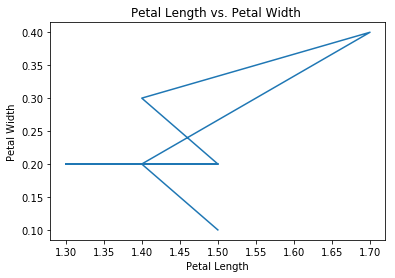

In [47]:
plt.plot(iris_df['Petal Length'][:10], iris_df['Petal Width'][:10])

# Label the axes
_ = plt.xlabel('Petal Length')
_ = plt.ylabel('Petal Width')

# #label the figure
plt.title('Petal Length vs. Petal Width ');


In [49]:
# introspection
plt.scatter


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)>

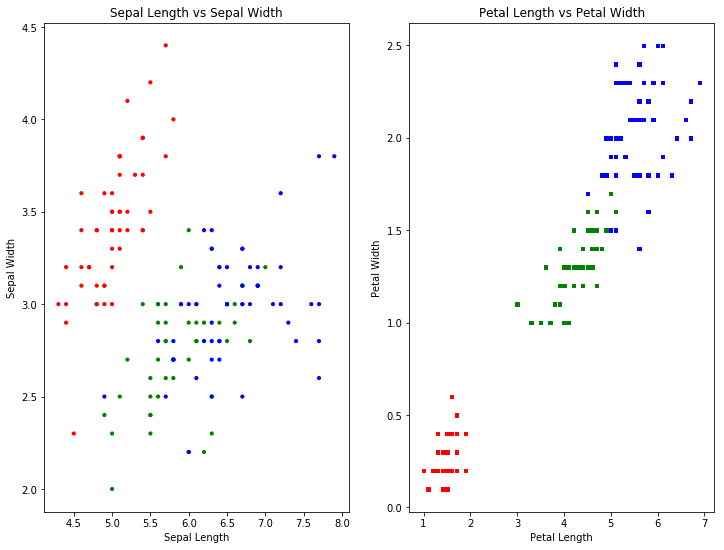

In [54]:
# Start with a plot figure of width 12 units and height 9 units 
plt.figure(figsize=(12,9))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
#nrows=1, ncols=2, plot_number=1
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot or plt.subplot?
plt.subplot(1, 2, 1)

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.scatter(iris_df['Sepal Length'], iris_df['Sepal Width'], c=colors[iris_df['Class']], s=10, marker = 'o')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1,2,2)
plt.scatter(iris_df['Petal Length'].values, iris_df['Petal Width'].values, c= colors[iris_df.Class], s=12, marker = 's')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
_ =plt.title('Petal Length vs Petal Width')

More plotting examples at: http://matplotlib.org/examples/index.html

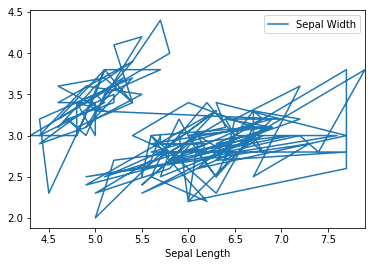

In [55]:
### using pandas plot function
iris_df.plot(x='Sepal Length', y='Sepal Width');

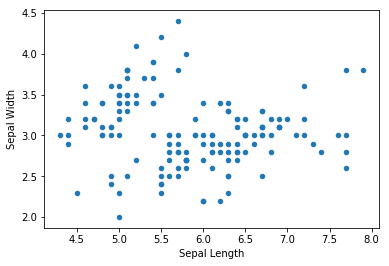

In [56]:
iris_df.plot(x='Sepal Length', y='Sepal Width', kind = 'scatter');

In [57]:
# loading data from a .csv file in a pandas dataframe

import pandas as pd
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.', header=None,
names= ['sepal_length', 'sepal_width', 
        'petal_length', 'petal_width',
        'target'])

### Train test dataset  spliting

In [58]:
np.seed = 42

# number of observations
n = X.shape[0]
print(n)
is_train = np.random.rand(n) < 0.7 # Create an array of the given shape and populate it with
                                   # random samples from a uniform distribution, and mask the numbers smaller than 0.7
                                   # the result is a boolean vector
print(sum(is_train))



150
109


In [59]:
X_train = X[is_train]  # boolean masking
y_train = y[is_train]
X_test = X[~is_train]
y_test = y[~is_train]
print('Size of training features matrix:', X_train.shape)
print('Size of training labels vector:', y_train.shape)
print('Size of test features matrix :', X_test.shape)
print('Size of test labels vector:', y_test.shape)

Size of training features matrix: (109, 4)
Size of training labels vector: (109,)
Size of test features matrix : (41, 4)
Size of test labels vector: (41,)


 ### Train test dataset  spliting using  *model_selection* class from sklearn

In [60]:
from sklearn import model_selection

# Split-out validation dataset
array = iris_df.values
type(array)
array.shape
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.3
seed = 7
X_train_2, X_validation_2, Y_train_2, Y_validation_2 = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [61]:
X_train_2.shape

(105, 4)